## Tarea de Redes Nueronales.
## Alumno: Federico Daniel Moran Fretes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("Dataset\mnist_train_small.csv", header = None)
data_test = pd.read_csv("Dataset\mnist_test.csv", header = None)

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\moran\AppData\Local\Temp\ipykernel_22632\2292152679.py:1: SyntaxWarning: invalid escape sequence '\m'
  data = pd.read_csv("Dataset\mnist_train_small.csv", header = None)
C:\Users\moran\AppData\Local\Temp\ipykernel_22632\2292152679.py:2: SyntaxWarning: invalid escape sequence '\m'
  data_test = pd.read_csv("Dataset\mnist_test.csv", header = None)


In [5]:
X = data.iloc[:,1:]
X_test = data_test.iloc[:,1:]

In [6]:
X = X.astype("float32")/255
X_test = X_test.astype("float32")/255

In [7]:
X_test.shape

(10000, 784)

# Etapa 1 - Autoencoder

In [8]:
from tensorflow import keras
from tensorflow.keras import layers, models

In [9]:
#diseño del modelo

## dimension del espacio latente
latent_dim = 32

## Encoder
encoder_input = layers.Input(shape = (784,), name = 'encoder_input')
x = layers.Dense(128, activation='relu', name = 'encoder_dense1')(encoder_input)
x = layers.Dense(64, activation='relu', name = 'encoder_dense2')(x)
latent = layers.Dense(latent_dim, activation='relu', name = 'espacio_latente')(x)

encoder = models.Model(encoder_input, latent, name='encoder')

encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ espacio_latente (Dense)         │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
## decoder
decoder_input = layers.Input(shape = (latent_dim,), name = 'decoder_input')
x = layers.Dense(64, activation='relu', name = 'decoder_dense1')(decoder_input)
x = layers.Dense(128, activation='relu', name = 'decoder_dense2')(x)
decoder_output = layers.Dense(784, activation='sigmoid', name = 'decoder_ouput')(x)

decoder = models.Model(decoder_input, decoder_output, name='decoder')

decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense1 (Dense)          │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense2 (Dense)          │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_ouput (Dense)           │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
## Autoencoder

autoencoder_input = layers.Input(shape=(784,), name='autoencoder_input')
x = encoder(autoencoder_input)
autoencoder_output = decoder(x)

autoencoder = models.Model(autoencoder_input, autoencoder_output, name='autoencoder')

autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ autoencoder_input (InputLayer)  │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
autoencoder.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['mse']
)

In [14]:
history = autoencoder.fit(
    X, X, epochs = 50, batch_size= 128, shuffle = True, validation_split = 0.2
)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2989 - mse: 0.0786 - val_loss: 0.2174 - val_mse: 0.0517
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1873 - mse: 0.0417 - val_loss: 0.1699 - val_mse: 0.0361
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1624 - mse: 0.0335 - val_loss: 0.1531 - val_mse: 0.0304
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1473 - mse: 0.0283 - val_loss: 0.1407 - val_mse: 0.0261
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1372 - mse: 0.0248 - val_loss: 0.1327 - val_mse: 0.0233
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1299 - mse: 0.0224 - val_loss: 0.1266 - val_mse: 0.0213
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1252 - mse: 0.0208 - val_loss: 0.1229 - val_mse: 0.0201
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1216 - mse: 0.0196 - val_loss: 0.1196 - val_mse: 0.0190
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - l

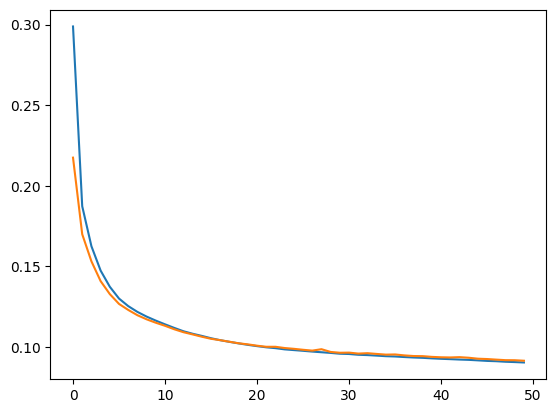

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [16]:
X_latent = encoder.predict(X, verbose=0)

In [17]:
X_latent.shape

(20000, 32)

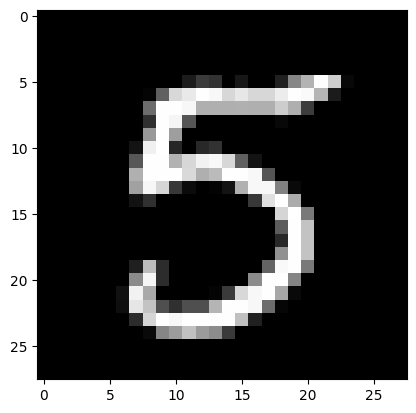

In [18]:
plt.imshow(X.values[1,:].reshape(28,28), cmap='gray')

# Etapa 2: Etapas de Clasificacion 

In [19]:
# Etiquetas (labels)
y = data.iloc[:, 0].astype("int64").values
y_test = data_test.iloc[:, 0].astype("int64").values

# One-hot (10 clases)
num_classes = 10
y_oh = keras.utils.to_categorical(y, num_classes)
y_test_oh = keras.utils.to_categorical(y_test, num_classes)

y.shape, y_test.shape, y_oh.shape


((20000,), (10000,), (20000, 10))

In [20]:
encoder.trainable = False

#todos los layers del encoder quedan no-entrenables
for layer in encoder.layers:
    layer.trainable = False

encoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_dense2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ espacio_latente (Dense)         │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 110,816 (432.88 KB)

In [21]:
from tensorflow.keras import regularizers

classifier_input = layers.Input(shape=(784,), name="classifier_input")

z = encoder(classifier_input)  # vector latente (32)

x = layers.Dense(64, activation="relu", name="clf_dense1")(z)
x = layers.Dropout(0.3, name="clf_dropout")(x)
classifier_output = layers.Dense(num_classes, activation="softmax", name="clf_output")(x)

classifier = models.Model(classifier_input, classifier_output, name="encoder_frozen_classifier")
classifier.summary()


Model: "encoder_frozen_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ classifier_input (InputLayer)   │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ clf_dense1 (Dense)              │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ clf_dropout (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ clf_output (Dense)              │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,578 (443.66 KB)

 Trainable params: 2,762 (10.79 KB)

 Non-trainable params: 110,816 (432.88 KB)

In [22]:
classifier.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [23]:
history_clf = classifier.fit(
    X.values, y_oh,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3163 - loss: 2.9046 - val_accuracy: 0.6342 - val_loss: 1.2119
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5991 - loss: 1.2079 - val_accuracy: 0.7598 - val_loss: 0.7885
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6893 - loss: 0.9208 - val_accuracy: 0.8130 - val_loss: 0.6043
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7439 - loss: 0.7680 - val_accuracy: 0.8493 - val_loss: 0.5094
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7751 - loss: 0.6834 - val_accuracy: 0.8655 - val_loss: 0.4476
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7936 - loss: 0.6201 - val_accuracy: 0.8765 - val_loss: 0.4153
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8093 - loss: 0.5772 - val_accuracy: 0.8838 - val_loss: 0.3883
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8239 - loss: 0.5493 - val_accuracy: 0.

In [24]:
history_clf = classifier.fit(
    X.values, y_oh,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8824 - loss: 0.3694 - val_accuracy: 0.9255 - val_loss: 0.2567
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8854 - loss: 0.3622 - val_accuracy: 0.9240 - val_loss: 0.2542
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8850 - loss: 0.3603 - val_accuracy: 0.9305 - val_loss: 0.2493
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8857 - loss: 0.3556 - val_accuracy: 0.9310 - val_loss: 0.2410
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8875 - loss: 0.3471 - val_accuracy: 0.9293 - val_loss: 0.2400
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8926 - loss: 0.3402 - val_accuracy: 0.9247 - val_loss: 0.2409
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8922 - loss: 0.3419 - val_accuracy: 0.9293 - val_loss: 0.2339
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8928 - loss: 0.3334 - val_accuracy: 0.

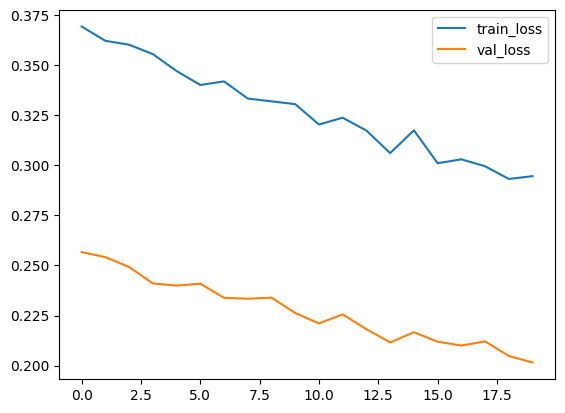

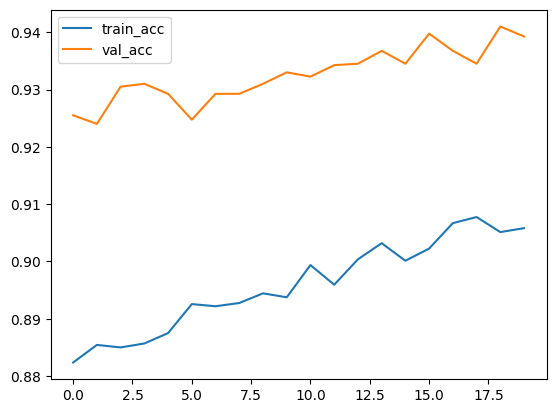

In [25]:
plt.figure()
plt.plot(history_clf.history["loss"], label="train_loss")
plt.plot(history_clf.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(history_clf.history["accuracy"], label="train_acc")
plt.plot(history_clf.history["val_accuracy"], label="val_acc")
plt.legend()
plt.show()


In [26]:
test_loss, test_acc = classifier.evaluate(X_test.values, y_test_oh, verbose=0)
test_loss, test_acc


(0.1944192349910736, 0.9405999779701233)

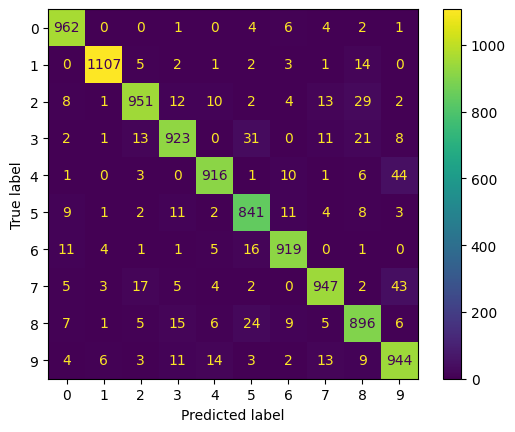

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(classifier.predict(X_test.values, verbose=0), axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format="d")
plt.show()
